# カテゴリ値を含むデータでのLightGBMを使った分析

### データ
[Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult) \
[Adult Census Income](https://www.kaggle.com/datasets/uciml/adult-census-income) \
[Adult income dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

### 参考
[lightgbmで二値分類の一連の流れをしたメモ](https://qiita.com/d_desuyon/items/807e01311ad08570ee78) \
[【初心者向け】特徴量重要度の算出 (LightGBM) 【Python】【機械学習】](https://mathmatical22.xyz/2020/04/12/%E3%80%90%E5%88%9D%E5%BF%83%E8%80%85%E5%90%91%E3%81%91%E3%80%91%E7%89%B9%E5%BE%B4%E9%87%8F%E9%87%8D%E8%A6%81%E5%BA%A6%E3%81%AE%E7%AE%97%E5%87%BA-lightgbm-%E3%80%90python%E3%80%91%E3%80%90%E6%A9%9F/) \
[LightGBMのCategorical Featureによって精度が向上するか？](https://qiita.com/sinchir0/items/b038757e578b790ec96a) \
[Pythonでしか描けない美しいデシジョンツリー（決定木）をlightGBMでも描こう！](https://qiita.com/hima2b4/items/b356e688ebdabc393da8) \
[LightGBM/XGBoostのtree構造可視化メモ](https://qiita.com/dyamaguc/items/70d4ce3548d49a6256fa) \
[Category Encodersでカテゴリ特徴量をストレスなく変換する](https://qiita.com/Hyperion13fleet/items/afa49a84bd5db65ffc31) \
[カテゴリ変数系特徴量の前処理(scikit-learnとcategory_encoders)](https://qiita.com/FukuharaYohei/items/06cc7b1c5eb124db6cdf) \
[LightGBMのCategorical Featureによって精度が向上するか？](https://qiita.com/sinchir0/items/b038757e578b790ec96a)

In [1]:
!python -V

Python 3.9.13


In [2]:
!python -m pip --version

pip 23.0.1 from C:\Python39\lib\site-packages\pip (python 3.9)



In [3]:
!python -m pip list

Package                  Version
------------------------ -----------
aiofiles                 22.1.0
aiosqlite                0.18.0
alembic                  1.9.4
anyio                    3.6.2
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
attrs                    22.2.0
Babel                    2.11.0
backcall                 0.2.0
beautifulsoup4           4.11.2
bleach                   6.0.0
bs4                      0.0.1
certifi                  2022.12.7
cffi                     1.15.1
charset-normalizer       3.0.1
cmaes                    0.9.1
colorama                 0.4.6
colorlog                 6.7.0
comm                     0.1.2
contourpy                1.0.7
cycler                   0.11.0
debugpy                  1.6.6
decorator                5.1.1
defusedxml               0.7.1
executing                1.2.0
fastjsonschema           2.16.2
fonttools                4.38.0
fqdn            

In [4]:
!python -m pip install -U pip

In [5]:
!python -m pip install pandas numpy scikit-learn lightgbm matplotlib

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, precision_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('adult_uci_label.csv')

In [8]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
1,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
2,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0
3,34,3,216864,11,9,0,7,4,4,0,0,3770,45,38,0
4,38,3,150601,0,6,5,0,4,4,1,0,3770,40,38,0
5,74,6,88638,10,16,4,9,2,4,0,0,3683,20,38,1
6,68,0,422013,11,9,0,9,1,4,0,0,3683,40,38,0
7,45,3,172274,10,16,0,9,4,2,0,0,3004,35,38,1
8,38,5,164526,14,15,4,9,1,4,1,0,2824,45,38,1
9,52,3,129177,9,13,6,7,1,4,0,0,2824,20,38,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int64
 2   fnlwgt          30162 non-null  int64
 3   education       30162 non-null  int64
 4   education.num   30162 non-null  int64
 5   marital.status  30162 non-null  int64
 6   occupation      30162 non-null  int64
 7   relationship    30162 non-null  int64
 8   race            30162 non-null  int64
 9   sex             30162 non-null  int64
 10  capital.gain    30162 non-null  int64
 11  capital.loss    30162 non-null  int64
 12  hours.per.week  30162 non-null  int64
 13  native.country  30162 non-null  int64
 14  income          30162 non-null  int64
dtypes: int64(15)
memory usage: 3.5 MB


In [10]:
columns_cat = [
    'workclass',
    'education',
    'marital.status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native.country',
    #'income',
]

In [11]:
{cat:'category' for cat in columns_cat}

{'workclass': 'category',
 'education': 'category',
 'marital.status': 'category',
 'occupation': 'category',
 'relationship': 'category',
 'race': 'category',
 'sex': 'category',
 'native.country': 'category'}

In [12]:
df = df.astype({cat:'category' for cat in columns_cat})

In [13]:
for cat in columns_cat:
    print(cat, df[cat].cat.categories)

workclass Int64Index([0, 1, 3, 4, 5, 6, 7], dtype='int64')
education Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')
marital.status Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')
occupation Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')
relationship Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')
race Int64Index([0, 1, 2, 3, 4], dtype='int64')
sex Int64Index([0, 1], dtype='int64')
native.country Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40],
           dtype='int64')


In [14]:
df['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [15]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
1,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
2,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0
3,34,3,216864,11,9,0,7,4,4,0,0,3770,45,38,0
4,38,3,150601,0,6,5,0,4,4,1,0,3770,40,38,0
5,74,6,88638,10,16,4,9,2,4,0,0,3683,20,38,1
6,68,0,422013,11,9,0,9,1,4,0,0,3683,40,38,0
7,45,3,172274,10,16,0,9,4,2,0,0,3004,35,38,1
8,38,5,164526,14,15,4,9,1,4,1,0,2824,45,38,1
9,52,3,129177,9,13,6,7,1,4,0,0,2824,20,38,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   workclass       30162 non-null  category
 2   fnlwgt          30162 non-null  int64   
 3   education       30162 non-null  category
 4   education.num   30162 non-null  int64   
 5   marital.status  30162 non-null  category
 6   occupation      30162 non-null  category
 7   relationship    30162 non-null  category
 8   race            30162 non-null  category
 9   sex             30162 non-null  category
 10  capital.gain    30162 non-null  int64   
 11  capital.loss    30162 non-null  int64   
 12  hours.per.week  30162 non-null  int64   
 13  native.country  30162 non-null  category
 14  income          30162 non-null  int64   
dtypes: category(8), int64(7)
memory usage: 1.8 MB


In [17]:
# 不要カラムの削除と並べ替え
df = df[["age",
         "workclass",
         #"fnlwgt",
         "education",
         "education.num",
         "marital.status",
         "occupation",
         "relationship",
         "race",
         "sex",
         "capital.gain",
         "capital.loss",
         "hours.per.week",
         "native.country",
         "income",]]
df.head(10)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,3,11,9,6,3,1,4,0,0,4356,18,38,0
1,54,3,5,4,0,6,4,4,0,0,3900,40,38,0
2,41,3,15,10,5,9,3,4,0,0,3900,40,38,0
3,34,3,11,9,0,7,4,4,0,0,3770,45,38,0
4,38,3,0,6,5,0,4,4,1,0,3770,40,38,0
5,74,6,10,16,4,9,2,4,0,0,3683,20,38,1
6,68,0,11,9,0,9,1,4,0,0,3683,40,38,0
7,45,3,10,16,0,9,4,2,0,0,3004,35,38,1
8,38,5,14,15,4,9,1,4,1,0,2824,45,38,1
9,52,3,9,13,6,7,1,4,0,0,2824,20,38,1


In [18]:
X = df.drop(['income'], axis=1)
y = df['income']

#Creation of Train and Test dataset
X_train, X_test , y_train, y_test  = train_test_split(X      , y      , test_size=0.2, shuffle=False)

#Creation of Train and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [19]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_valid.shape, y_valid.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (19303, 13)(19303,)
Validation dataset: (4826, 13)(4826,)
Test dataset: (6033, 13)(6033,)


In [20]:
# データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [21]:
# LightGBM のハイパーパラメータ
params = {
    # 二値分類問題
    'objective': 'binary',
    # AUC の最大化を目指す
    'metric': 'auc',
    # Fatal の場合出力
    'verbosity': -1,
    # 乱数シード
    'seed': 31,
    # 学習率
    'learning_rate': 0.02,
}

In [22]:
# 上記のパラメータでモデルを学習する
model = lgb.train(params, lgb_train, valid_sets=lgb_valid,
                  verbose_eval=50,  # 50イテレーション毎に学習結果出力
                  num_boost_round=10000,  # 最大イテレーション回数指定
                  early_stopping_rounds=100,
                  categorical_feature = columns_cat, # categorical_featureを設定
                 )

Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['education', 'marital.status', 'native.country', 'occupation', 'race', 'relationship', 'sex', 'workclass']
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C

[50]	valid_0's auc: 0.895159
[100]	valid_0's auc: 0.899195
[150]	valid_0's auc: 0.902019
[200]	valid_0's auc: 0.903495
[250]	valid_0's auc: 0.904103
[300]	valid_0's auc: 0.904035
[350]	valid_0's auc: 0.904001
Early stopping, best iteration is:
[257]	valid_0's auc: 0.904144


In [23]:
# テストデータを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

AUC 0.8932176115955798


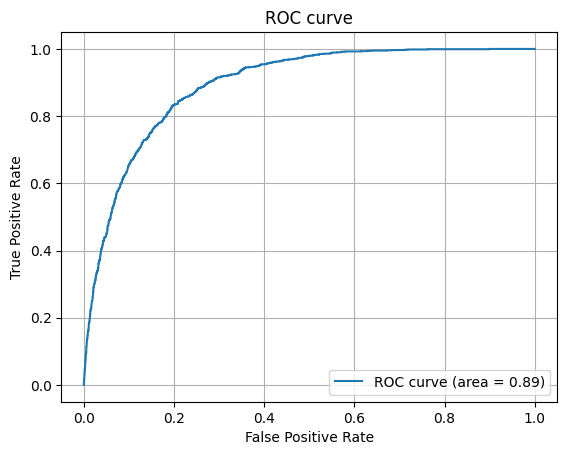

accuracy 0.8538040775733466
precision 0.6773480662983425


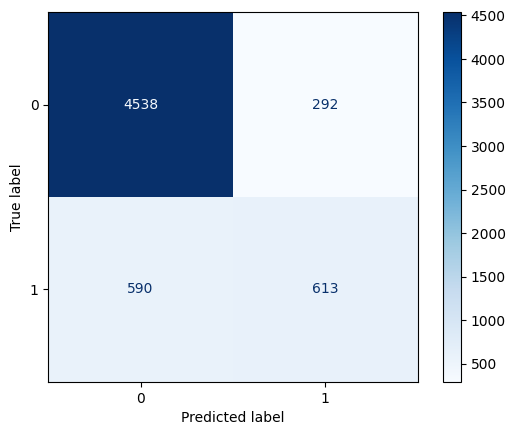

In [24]:
# AUCを計算
fpr, tpr, thresholds = roc_curve(np.asarray(y_test), y_pred)
print("AUC", auc(fpr, tpr))

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc(fpr, tpr))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# accuracy, precisionを計算
acc = accuracy_score(np.asarray(y_test), np.round(y_pred))
precision = precision_score(np.asarray(y_test), np.round(y_pred))
print("accuracy", acc)
print("precision", precision)

# 混同行列をプロット
y_pred = np.round(y_pred)
cm = confusion_matrix(np.asarray(y_test), np.where(y_pred < 0.5, 0, 1))
cmp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
cmp.plot(cmap=plt.cm.Blues)
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

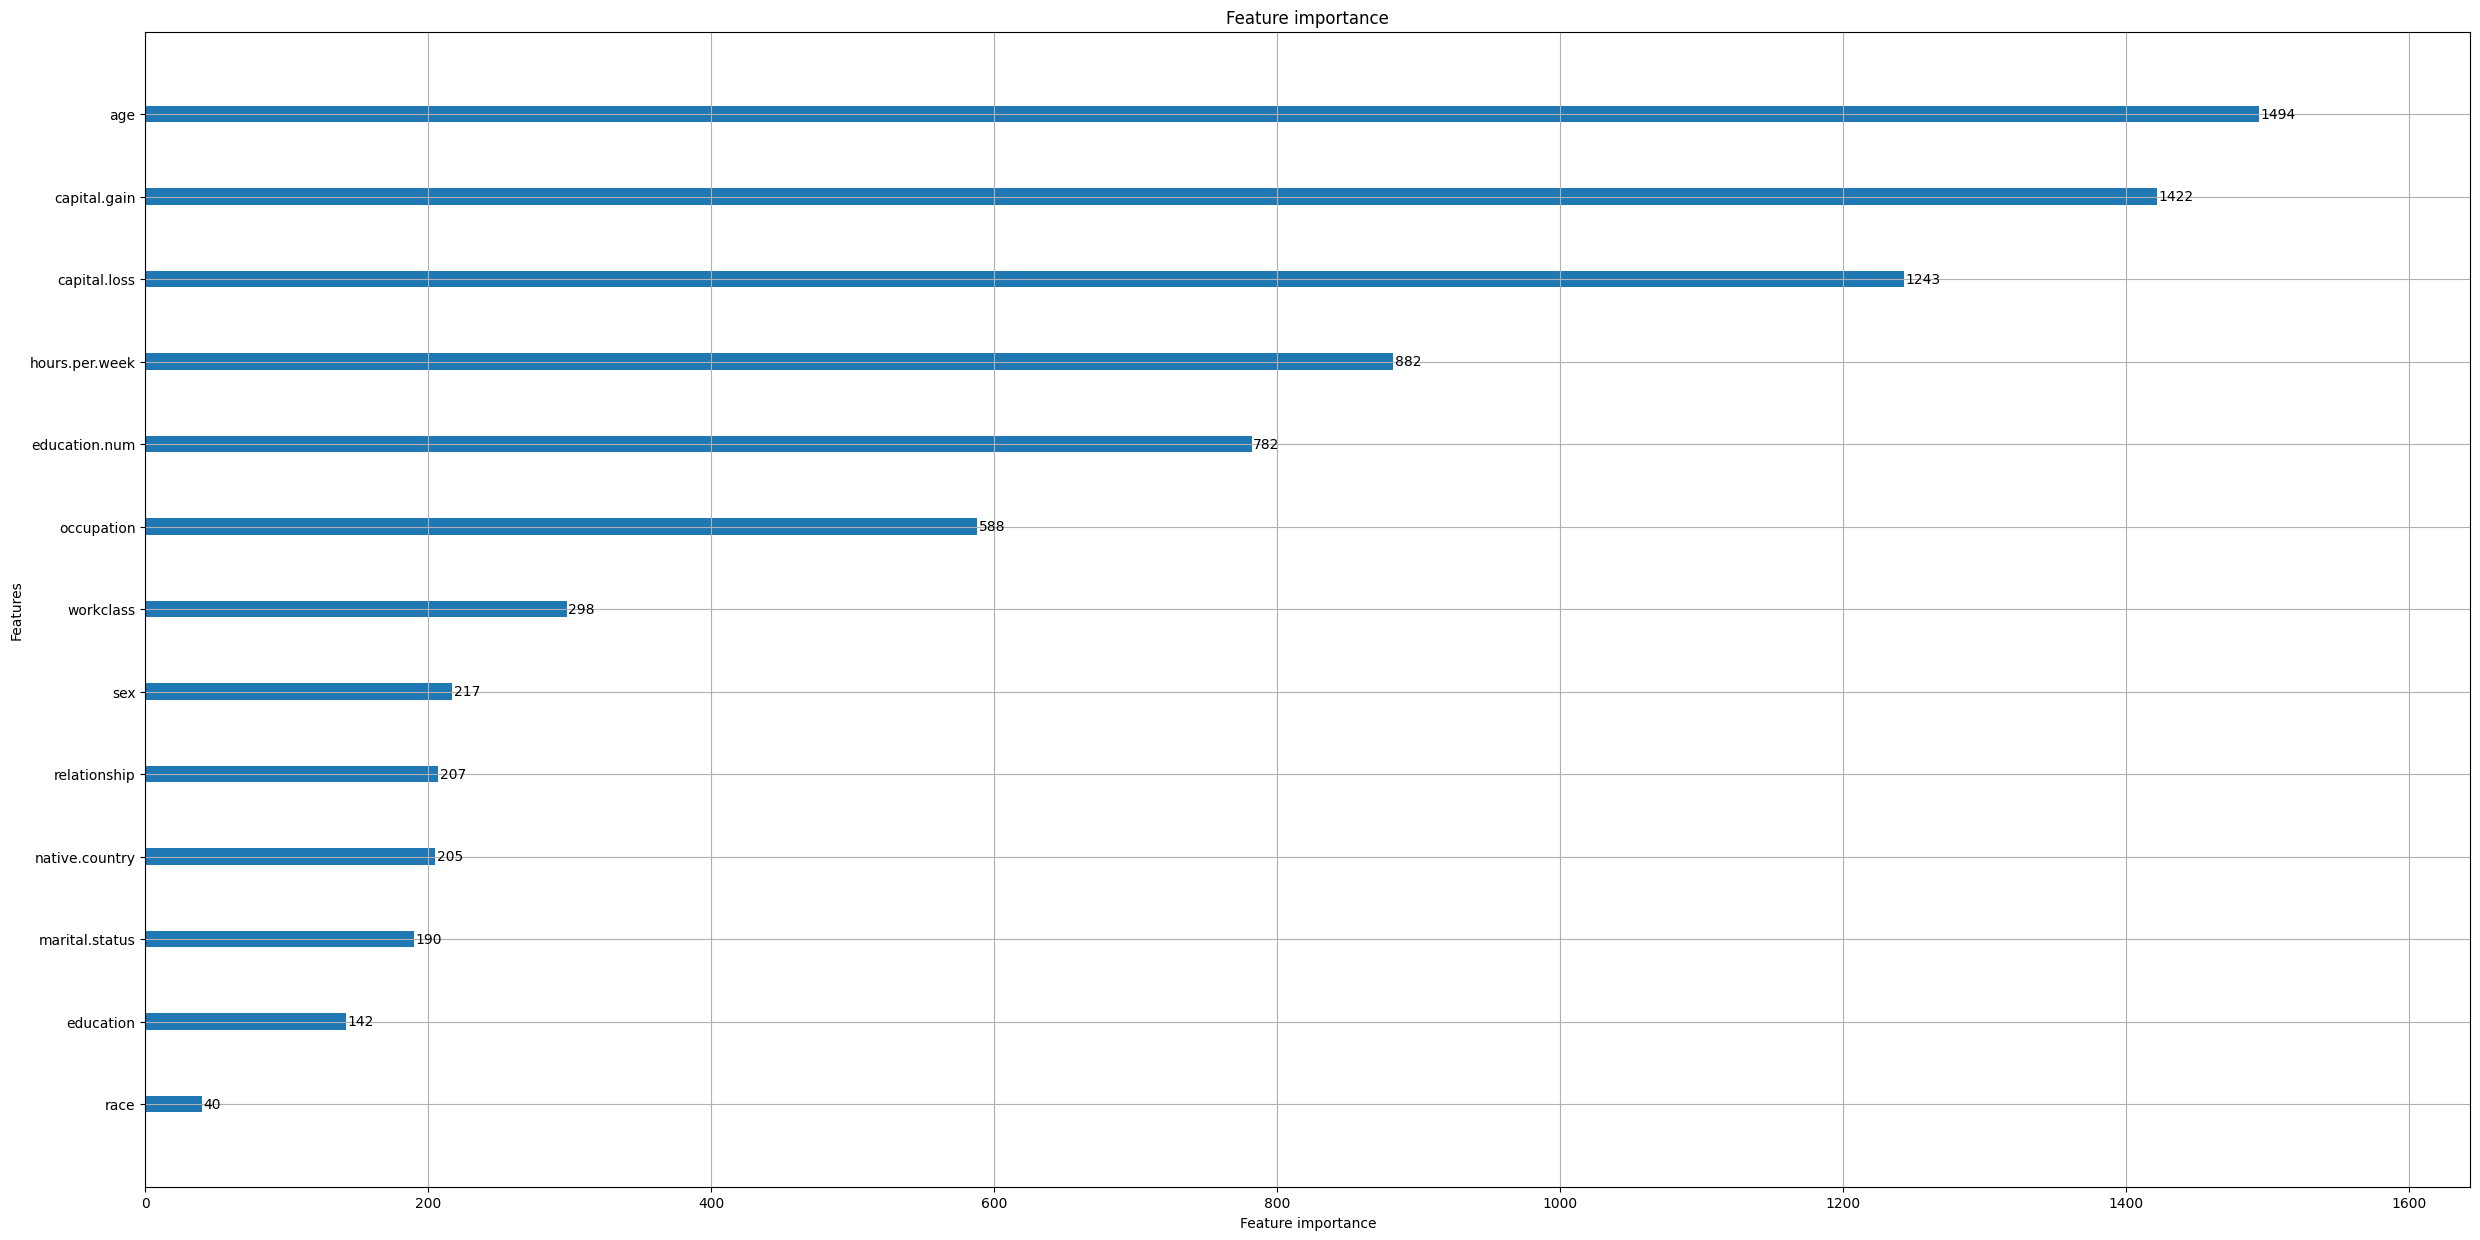

In [25]:
# 重要度としては「特徴量が分岐（ノード）の条件式で使用された回数」（＝デフォルト）
lgb.plot_importance(model, figsize=(30, 15), max_num_features=30, importance_type='split')

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

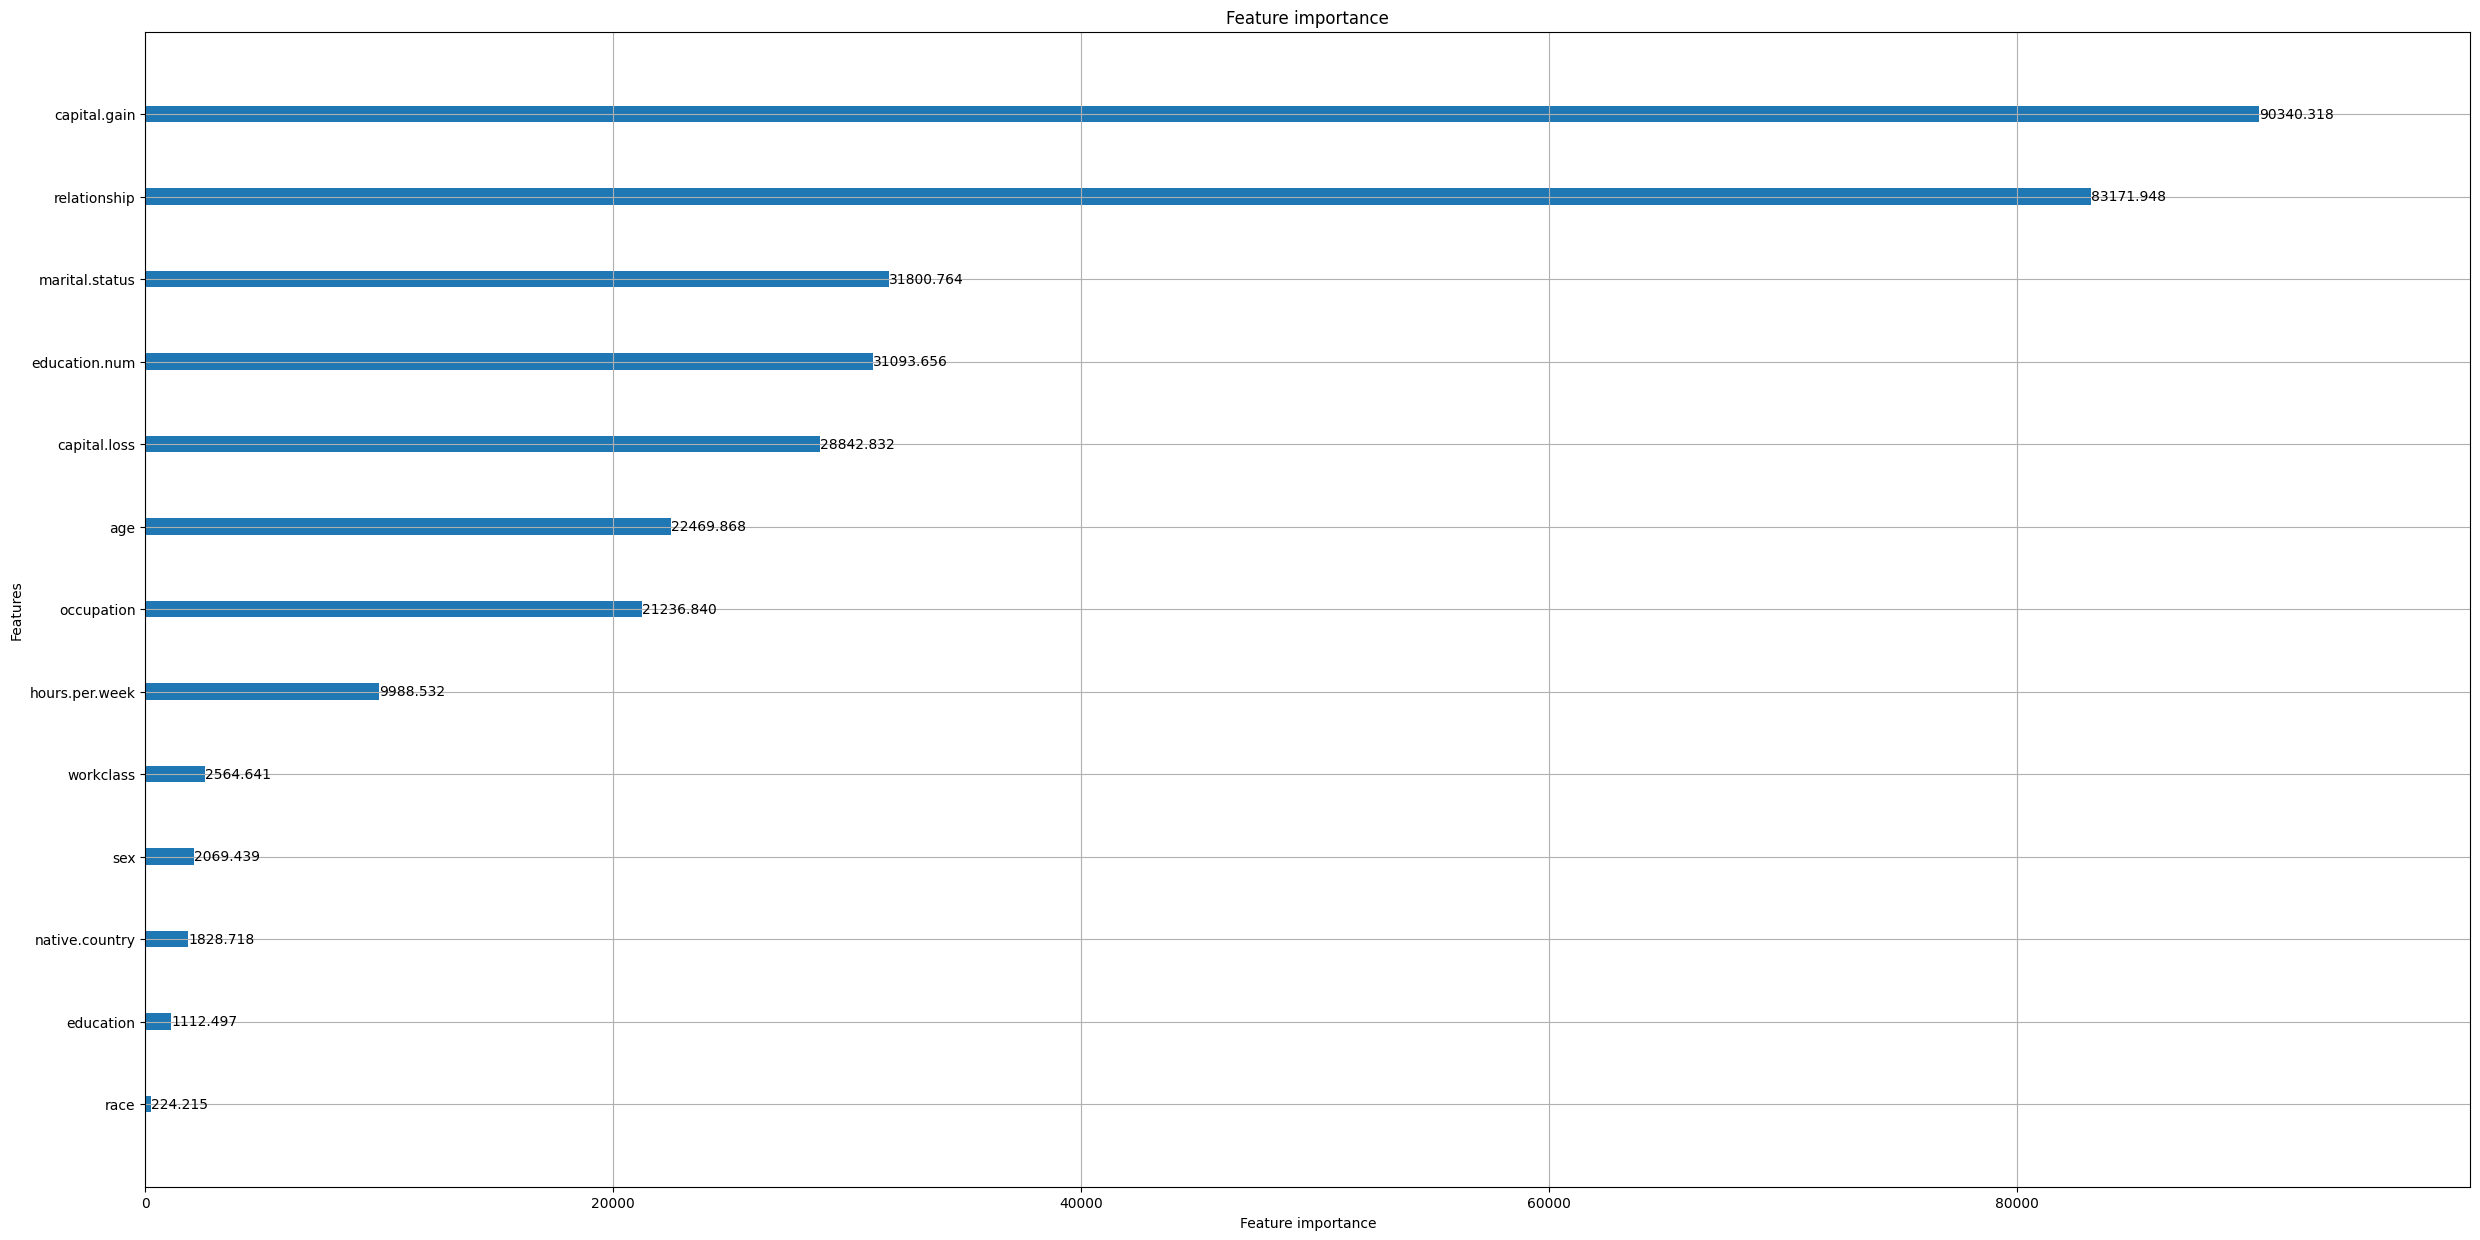

In [26]:
# 重要度としては「特徴量がある分岐（ノード）において目的関数の改善に寄与した度合い」
lgb.plot_importance(model, figsize=(30, 15), max_num_features=30, importance_type='gain')

In [27]:
# データフレームを綺麗に出力する関数
import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

In [28]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル

In [29]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(df.drop('income',axis=1).columns) # 特徴量名のリスト(目的変数target以外)
# 特徴量重要度の算出方法 'gain'(推奨) : トレーニングデータの損失の減少量を評価
f_importance = np.array(model.feature_importance(importance_type='gain')) # 特徴量重要度の算出 //
f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

,feature,importance
9,capital.gain,0.276486
6,relationship,0.254548
4,marital.status,0.097326
3,education.num,0.095162
10,capital.loss,0.088273


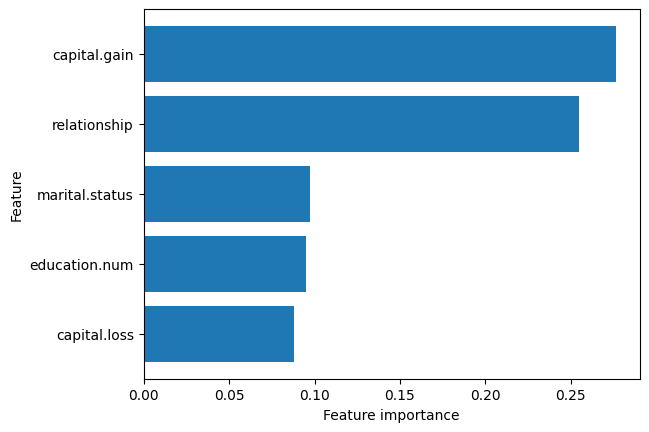

In [30]:
# 特徴量重要度の可視化
n_display = 5 # 上位10個に制限
plot_feature_importance(df_importance.iloc[:n_display,:])

In [31]:
import csv
# 決定木をDataFrameに変換
model.trees_to_dataframe().to_csv('adult_uci_label-categoricalfeature_decisiontree.csv', index=False, header=True, encoding='UTF-8', sep=',', quoting=csv.QUOTE_ALL)

In [32]:
df_tree = pd.read_csv('adult_uci_label-categoricalfeature_decisiontree.csv')

In [33]:
df_tree.head(10)

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S1,0-S2,NaN,relationship,3960.030029,0||5,==,right,None,-0.961185,0.000000,19303
1,0,2,0-S1,0-S3,0-L2,0-S0,capital.gain,1628.290039,5036.500000000001,<=,left,None,-0.940035,1842.020000,9205
2,0,3,0-S3,0-S4,0-S7,0-S1,education.num,1167.910034,12.500000000000002,<=,left,None,-0.946983,1614.290000,8067
3,0,4,0-S4,0-S6,0-S5,0-S3,capital.loss,325.166992,1789.0000000000002,<=,left,None,-0.957648,1158.840000,5791
4,0,5,0-S6,0-S10,0-S12,0-S4,occupation,197.440994,0||3||9||10||11||12,==,right,NaN,-0.960339,1088.600000,5440
5,0,6,0-S10,0-L0,0-S14,0-S6,age,83.128502,33.50000000000001,<=,left,None,-0.950120,438.843000,2193
6,0,7,0-L0,NaN,NaN,0-S10,NaN,NaN,NaN,NaN,NaN,NaN,-0.964840,110.861346,554
7,0,7,0-S14,0-S20,0-S25,0-S10,education.num,59.658798,9.500000000000002,<=,left,None,-0.944807,327.981000,1639
8,0,8,0-S20,0-L11,0-S27,0-S14,hours.per.week,35.336300,34.50000000000001,<=,left,None,-0.953458,161.689000,808
9,0,9,0-L11,NaN,NaN,0-S20,NaN,NaN,NaN,NaN,NaN,NaN,-0.978056,20.411295,102


In [34]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15677 entries, 0 to 15676
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tree_index         15677 non-null  int64  
 1   node_depth         15677 non-null  int64  
 2   node_index         15677 non-null  object 
 3   left_child         7710 non-null   object 
 4   right_child        7710 non-null   object 
 5   parent_index       15420 non-null  object 
 6   split_feature      7710 non-null   object 
 7   split_gain         7710 non-null   float64
 8   threshold          7710 non-null   object 
 9   decision_type      7710 non-null   object 
 10  missing_direction  7710 non-null   object 
 11  missing_type       6247 non-null   object 
 12  value              15677 non-null  float64
 13  weight             15677 non-null  float64
 14  count              15677 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 1.8+ MB
